In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; 
# warnings.filterwarnings('ignore')

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


In [2]:
print(sys.version)

3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]


# 第5章 量化工具-可视化

In [3]:
import matplotlib.pyplot as plt

## 5.1 使用matplotlib可视化数据

In [5]:
from abupy import ABuSymbolPd
tsla_df = ABuSymbolPd.make_kl_df('TSLA',n_folds=2)
tsla_df.head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.6418,8.0328
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.7351,8.2162
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.5443,7.9672


### 5.1.1 matplotlib可视化基础

In [6]:
def plot_demo(axs=None,just_series = False):
    '''
    axs:子画布
    just_series:是否只绘制一条series曲线
    '''
    drawer = axs if axs else plt
    drawer.plot(tsla_df.close,"r")
    if not just_series:
        drawer.plot(tsla_df.close.index,tsla_df.close.values+10,"g")
        drawer.plot(tsla_df.close.index.tolist(),(tsla_df.close.values+20).tolist(),"b")
        plt.xlabel('time')
        plt.ylabel('close')
        plt.title('tsla close')

d:\mypython\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


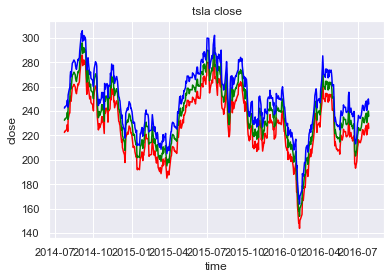

In [7]:
plot_demo()

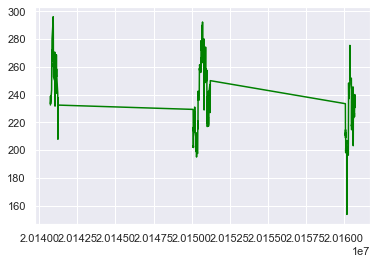

In [8]:
plt.plot(tsla_df.date.values,tsla_df.close.values+10,"g")

### 5.1.2 matplotlib子画布及loc的使用

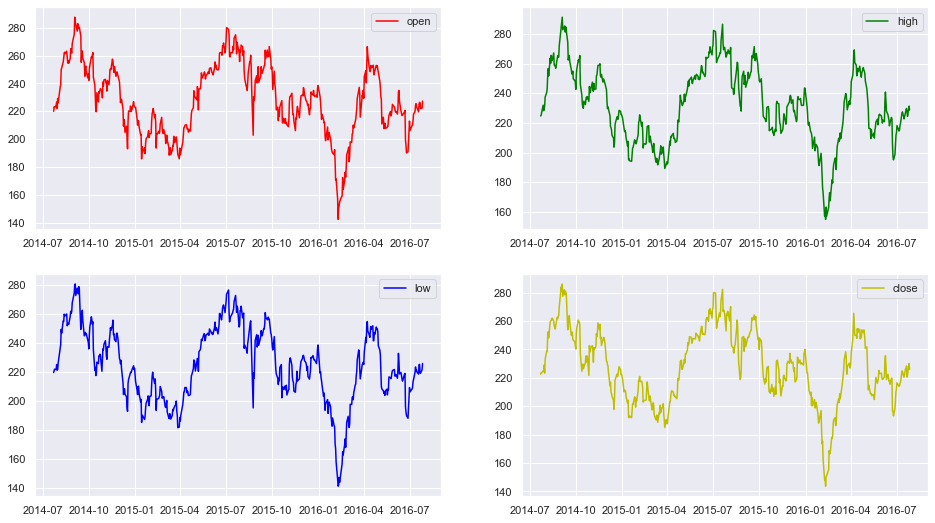

In [9]:
_,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,9))
axes[0][0].plot(tsla_df.open,c='r',label='open')
axes[0][0].legend()
axes[0][1].plot(tsla_df.high,c='g',label='high')
axes[0][1].legend()
axes[1][0].plot(tsla_df.low,c='b',label='low')
axes[1][0].legend()
axes[1][1].plot(tsla_df.close,c='y',label='close')
axes[1][1].legend()

### 5.1.3 k线图的绘制

(<matplotlib.collections.LineCollection at 0x13e3fb00>,
 <matplotlib.collections.PolyCollection at 0x13e3fba8>)

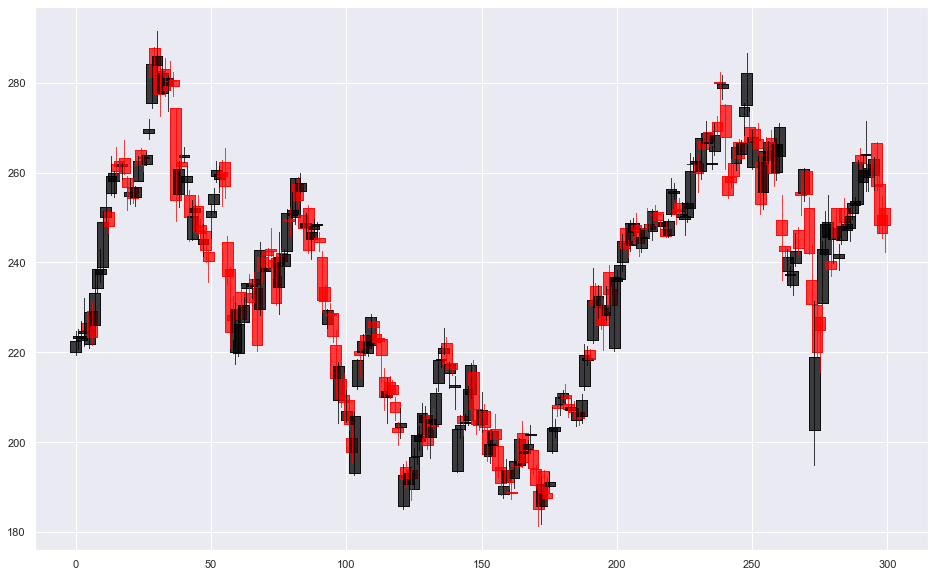

In [10]:
import mpl_finance as mpf
tsla_30_df=tsla_df[:300]
_,axes = plt.subplots(figsize=(16,10))
axes
mpf.candlestick2_ohlc(axes,tsla_30_df.open,tsla_30_df.high,tsla_30_df.low,tsla_30_df.close)

## 5.2 使用bokeh交互可视化

In [11]:
from abupy import ABuMarketDrawing
ABuMarketDrawing.plot_candle_form_klpd(tsla_df,html_bk=True)

## 5.3 使用pandas可视化数据
### 5.3.1 绘制股票的收益，及收益波动情况

In [19]:
import random
test_array = np.array([random.randint(10,20) for i in range(10)])
print(test_array)
# pd.rolling_std(test_array,window=2,center=False)
s=pd.Series(test_array)
s.rolling(4).std()

[19 13 16 10 20 20 12 14 11 16]


0       NaN
1       NaN
2       NaN
3    3.8730
4    4.2720
5    4.7258
6    5.2599
7    4.1231
8    4.0311
9    2.2174
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B88D048>,
      dtype=object)

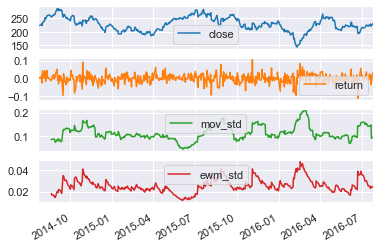

In [45]:
tsla_df_copy = tsla_df.copy()
#投资回报
tsla_df_copy['return'] = np.log(tsla_df.close/tsla_df.close.shift(1))
#y移动收益标准差
tsla_df_copy['mov_std'] = pd.Series(tsla_df_copy['return']).rolling(20).std()*np.sqrt(20)
#加权移动收益标准差
tsla_df_copy['ewm_std'] =pd.Series(tsla_df_copy['return']).ewm(span=20,min_periods=20).std()
tsla_df_copy[['close','return','mov_std','ewm_std']].plot(subplots=True)

### 5.3.2 绘制股票的价格与均线

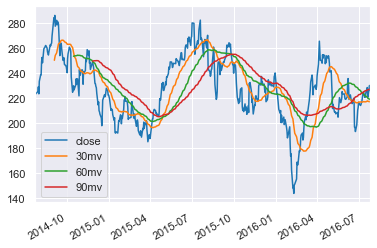

In [50]:
tsla_df.close.plot()
tsla_df.close.rolling(30).mean().plot()
tsla_df.close.rolling(60).mean().plot()
tsla_df.close.rolling(90).mean().plot()
plt.legend(["close",'30mv','60mv','90mv'])

### 5.3.3 其它pandas统计图形种类

In [61]:
#这是取出所有低开高走的数据
ret=tsla_df[(tsla_df.close>tsla_df.open)&(tsla_df.key != tsla_df.shape[0]-1)]
ret.head(1)

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.9775,8.4591


In [62]:
#因为要验证，符合上列条件的交易日第二天是否会上涨
#取出所有第二天的数据
low_to_high_df=tsla_df.iloc[ret.key.values+1]
low_to_high_df.head(1)

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-24,223.54,225.1,220.8,0.47,223.25,222.49,3248410,20140724,3,1,8.8129,8.2492


In [64]:
#下面验证第二天是否为上涨的交易日
#where进行数据简化
change_ceil_floor = np.where(low_to_high_df.p_change>0,
                            np.ceil(low_to_high_df.p_change),
                            np.floor(low_to_high_df.p_change))

1.低开高收情况下，第二个交易日上涨的总幅度

In [68]:
print("取整后，上涨的总合:",change_ceil_floor[change_ceil_floor>0].sum())
print("真实数据，上涨的总合:",low_to_high_df.p_change[low_to_high_df.p_change>0].sum())
print("上涨的天数:",len(change_ceil_floor[change_ceil_floor>0]))

取整后，上涨的总合: 274.0
真实数据，上涨的总合: 207.76999999999998
上涨的天数: 117


2.低开高收情况下，第二个交易日下跌的总幅度

In [69]:
print("取整后，下跌的总合:",change_ceil_floor[change_ceil_floor<0].sum())
print("真实数据，下跌的总合:",low_to_high_df.p_change[low_to_high_df.p_change<0].sum())
print("下跌的天数:",len(change_ceil_floor[change_ceil_floor<0]))

取整后，下跌的总合: -311.0
真实数据，下跌的总合: -236.23
下跌的天数: 140


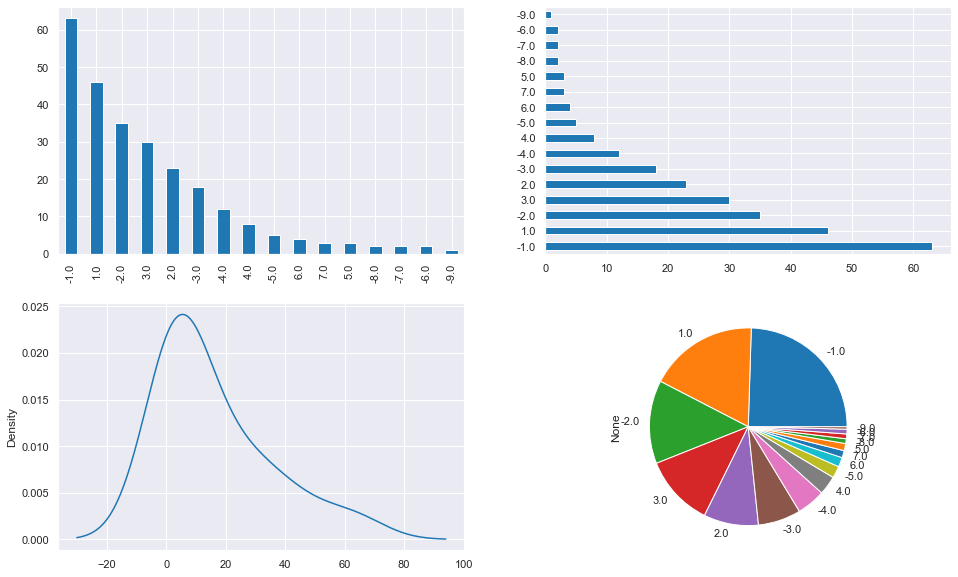

In [78]:
change_ceil_floor = pd.Series(change_ceil_floor)
_,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
#竖直的柱状图
change_ceil_floor.value_counts().plot(kind="bar",ax=axes[0][0])
#水平的柱状图
change_ceil_floor.value_counts().plot(kind="barh",ax=axes[0][1])
#概率密度提
change_ceil_floor.value_counts().plot(kind="kde",ax=axes[1][0])
#饼图
change_ceil_floor.value_counts().plot(kind="pie",ax=axes[1][1])

## 5.4 使用seaborn可视化数据

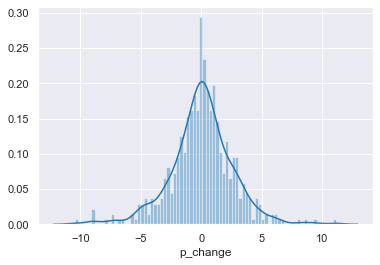

In [80]:
import seaborn as sns
sns.distplot(tsla_df.p_change,bins=80)

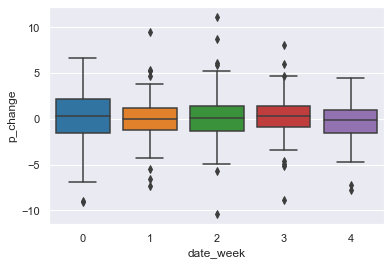

In [81]:
sns.boxplot(x='date_week',y="p_change",data=tsla_df)

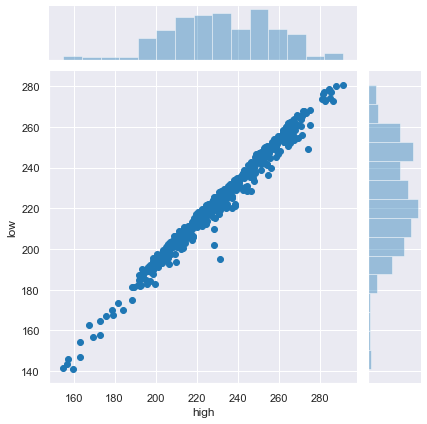

In [82]:
sns.jointplot(tsla_df.high,tsla_df.low)

In [102]:
change_df = pd.DataFrame({"tsla":tsla_df.p_change})
change_df=change_df.join(pd.DataFrame({"google":ABuSymbolPd.make_kl_df('usGOOG',n_folds=2).p_change}),
                         how="outer")
change_df=change_df.join(pd.DataFrame({"apple":ABuSymbolPd.make_kl_df('usAAPL',n_folds=2).p_change}),
                         how="outer")
change_df=change_df.join(pd.DataFrame({"facebook":ABuSymbolPd.make_kl_df('usFB',n_folds=2).p_change}),
                         how="outer")
change_df=change_df.join(pd.DataFrame({"baidu":ABuSymbolPd.make_kl_df('usBIDU',n_folds=2).p_change}),
                         how="outer")
change_df=change_df.dropna()
change_df.head()

,tsla,google,apple,facebook,baidu
2014-07-25,0.01,-0.73,0.66,0.28,10.88
2014-07-28,0.56,0.27,1.38,-0.36,-0.31
2014-07-29,0.08,-0.84,-0.65,-1.62,-2.57
2014-07-30,1.74,0.31,-0.23,1.31,-0.40
2014-07-31,-2.45,-2.69,-2.60,-2.71,-1.41


In [103]:
change_df.corr()

,tsla,google,apple,facebook,baidu
tsla,1.0000,0.3086,0.3118,0.3988,0.3388
google,0.3086,1.0000,0.4010,0.5570,0.3665
apple,0.3118,0.4010,1.0000,0.4496,0.3330
facebook,0.3988,0.5570,0.4496,1.0000,0.3365
baidu,0.3388,0.3665,0.3330,0.3365,1.0000


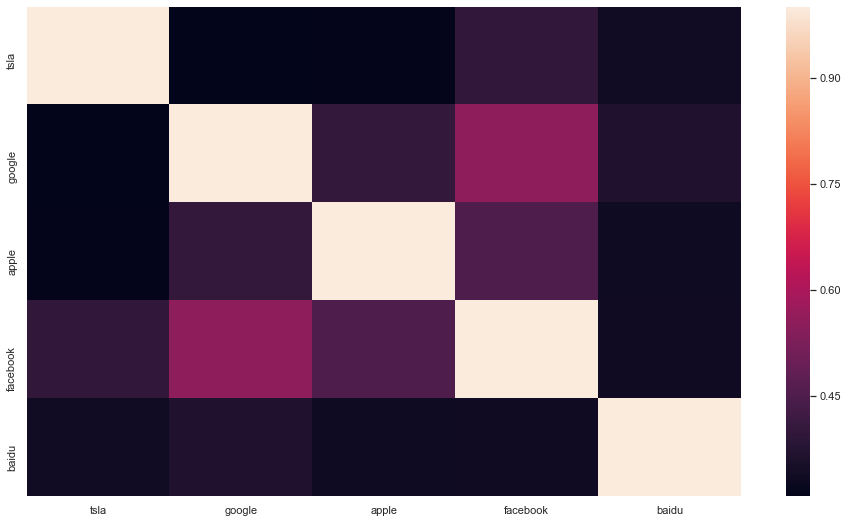

In [104]:
_,axes = plt.subplots(figsize=(16,9))
sns.heatmap(change_df.corr(),ax=axes)

## 5.5 实例1:可视化量化策略的交易区间，卖出原因

## 5.6 实例2:标准化两个股票的观察周期

## 5.7 综合实例3:黄金分割线

### 5.7.1 黄金分割线的定义方式

### 5.7.2 多维数据绘制示例

## 5.8 技术指标的可视化

### 5.8.1 MACD指标的可视化

### 5.8.2 ATR指标的可视化